# Code von Flo

In [8]:
import sys
import os
import pandapower as pp
import pandapower.plotting as plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add the path to the directory containing the module you want to import
sys.path.append(os.path.abspath('../Flo'))
import pv_battery_model



No or insufficient geodata available --> Creating artificial coordinates. This may take some time


   time  voltage_bus_lv  voltage_bus_1_1  voltage_bus_1_2  \
0     0        1.010191         1.001505         0.993302   
1     1        1.010370         1.003606         0.997414   
2     2        1.010288         1.003210         0.996687   
3     3        1.010314         1.003399         0.997055   
4     4        1.010371         1.003903         0.997923   

   voltage_bus_1_2_1_1  voltage_bus_1_2_1_2  voltage_bus_1_2_2_1  \
0             0.990278             0.987904             0.990541   
1             0.995223             0.993486             0.995202   
2             0.994389             0.992530             0.994369   
3             0.994819             0.993028             0.994789   
4             0.995779             0.994080             0.995836   

   voltage_bus_1_2_2_2  voltage_bus_2_1  voltage_bus_2_2  voltage_bus_2_2_1_1  \
0             0.990154         1.003573         0.997443             0.995117   
1             0.994730         1.003794         0.997792      

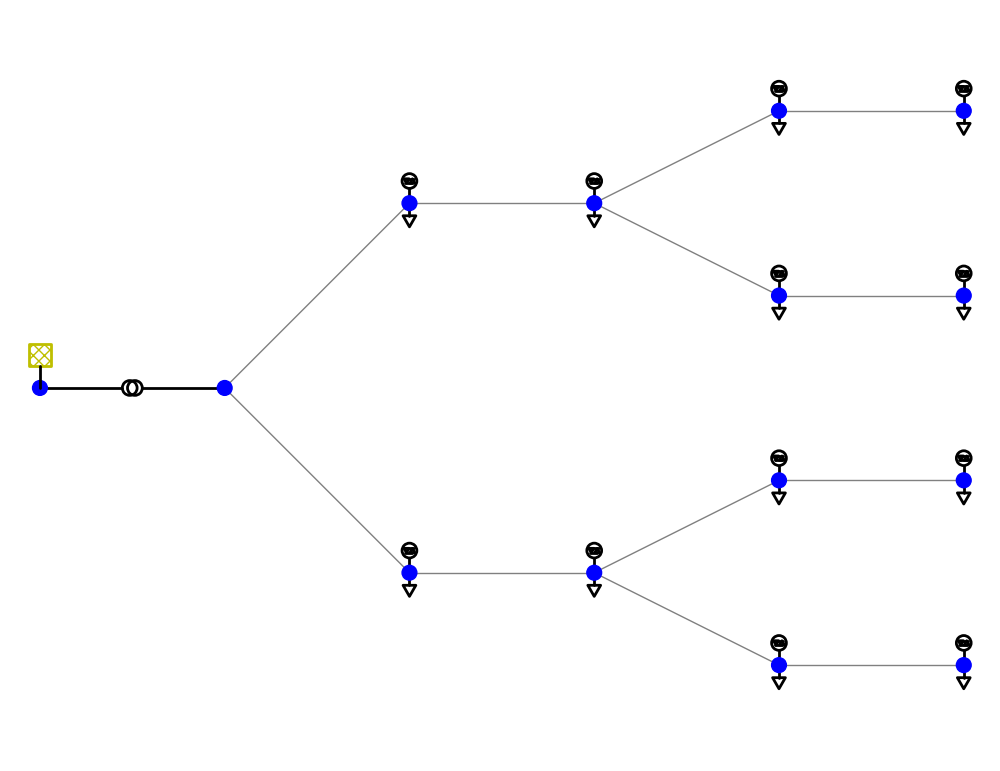

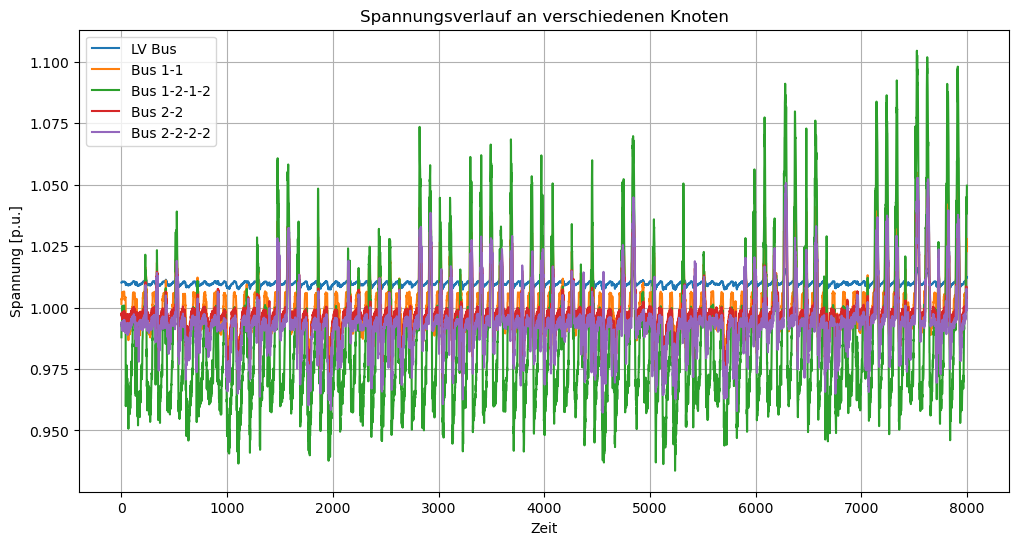

In [65]:

# Erstellung eines leeren Netzes
net = pp.create_empty_network()

# create bus
mv_bus = pp.create_bus(net, vn_kv=20, name="MV Bus")  # Mittelspannungsseite
lv_bus = pp.create_bus(net, vn_kv=0.4, name="LV Bus")  # Niederspannungsseite

v1_1 = pp.create_bus(net, vn_kv=0.4, name="v1.1")
v1_2 = pp.create_bus(net, vn_kv=0.4, name="v1.2")
v1_2_1_1 = pp.create_bus(net, vn_kv=0.4, name="v1.2.1.1")
v1_2_1_2 = pp.create_bus(net, vn_kv=0.4, name="v1.2.1.2")
v1_2_2_1 = pp.create_bus(net, vn_kv=0.4, name="v1.2.2.1")
v1_2_2_2 = pp.create_bus(net, vn_kv=0.4, name="v1.2.2.2")
v2_1 = pp.create_bus(net, vn_kv=0.4, name="v2.1")
v2_2 = pp.create_bus(net, vn_kv=0.4, name="v2.2")
v2_2_1_1 = pp.create_bus(net, vn_kv=0.4, name="v2.2.1.1")
v2_2_1_2 = pp.create_bus(net, vn_kv=0.4, name="v2.2.1.2")
v2_2_2_1 = pp.create_bus(net, vn_kv=0.4, name="v2.2.2.1")
v2_2_2_2 = pp.create_bus(net, vn_kv=0.4, name="v2.2.2.2")

# external grid
pp.create_ext_grid(net, mv_bus, vm_pu=1.02, name="external grid")

# create transformer
pp.create_transformer(net, mv_bus, lv_bus, std_type="0.4 MVA 20/0.4 kV")
#print(pp.available_std_types(net, "trafo"))     # zeigt mir verschiedene verfügbare Trafos

# create line
pp.create_line(net, lv_bus, v1_1, std_type="NAYY 4x50 SE", length_km=0.1, name="line1.1")
pp.create_line(net, v1_1, v1_2, std_type="NAYY 4x50 SE", length_km=0.1, name="line1.2")
pp.create_line(net, v1_2, v1_2_1_1, std_type="NAYY 4x50 SE", length_km=0.1, name="line1.2.1.1")
pp.create_line(net, v1_2_1_1, v1_2_1_2, std_type="NAYY 4x50 SE", length_km=0.1, name="line1.2.1.2")
pp.create_line(net, v1_2, v1_2_2_1, std_type="NAYY 4x50 SE", length_km=0.1, name="line1.2.2.1")
pp.create_line(net, v1_2_2_1, v1_2_2_2, std_type="NAYY 4x50 SE", length_km=0.1, name="line1.2.2.2")
pp.create_line(net, lv_bus, v2_1, std_type="NAYY 4x50 SE", length_km=0.1, name="line2_1")
pp.create_line(net, v2_1, v2_2, std_type="NAYY 4x50 SE", length_km=0.1, name="line2.2")
pp.create_line(net, v2_2, v2_2_1_1, std_type="NAYY 4x50 SE", length_km=0.1, name="line2.2.1.1")
pp.create_line(net, v2_2_1_1, v2_2_1_2, std_type="NAYY 4x50 SE", length_km=0.1, name="line2.2.1.2")
pp.create_line(net, v2_2, v2_2_2_1, std_type="NAYY 4x50 SE", length_km=0.1, name="line2.2.2.1")
pp.create_line(net, v2_2_2_1, v2_2_2_2, std_type="NAYY 4x50 SE", length_km=0.1, name="line2.2.2.2")
#print(pp.available_std_types(net))                # zeigt mir verschiedene verfügbare Kabeltypen


# Variablenzuweisung für Lasten und Erzeuger
l_1_1 = pp.create_load(net, v1_1, p_mw=0.1, q_mvar=0.01, name="L1.1")
l_1_2 = pp.create_load(net, v1_2, p_mw=0.0, q_mvar=0.01, name="L1.2")
l_1_2_1_1 = pp.create_load(net, v1_2_1_1, p_mw=0.0, q_mvar=0.01, name="L1.2.1.1")
l_1_2_1_2 = pp.create_load(net, v1_2_1_2, p_mw=0.0, q_mvar=0.01, name="L1.2.1.2")
l_1_2_2_1 = pp.create_load(net, v1_2_2_1, p_mw=0.0, q_mvar=0.01, name="L1.2.2.1")
l_1_2_2_2 = pp.create_load(net, v1_2_2_2, p_mw=0.0, q_mvar=0.01, name="L1.2.2.2")
l_2_1 = pp.create_load(net, v2_1, p_mw=0.0, q_mvar=0.01, name="L2.1")
l_2_2 = pp.create_load(net, v2_2, p_mw=0.1, q_mvar=0.01, name="L2.2")
l_2_2_1_1 = pp.create_load(net, v2_2_1_1, p_mw=0.0, q_mvar=0.01, name="L2.2.1.1")
l_2_2_1_2 = pp.create_load(net, v2_2_1_2, p_mw=0.0, q_mvar=0.01, name="L2.2.1.2")
l_2_2_2_1 = pp.create_load(net, v2_2_2_1, p_mw=0.1, q_mvar=0.01, name="L2.2.2.1")
l_2_2_2_2 = pp.create_load(net, v2_2_2_2, p_mw=0.0, q_mvar=0.01, name="L2.2.2.2")

# Variablenzuweisung für Erzeuger
e_1_1 = pp.create_sgen(net, v1_1, p_mw=0.02, q_mvar=0.005, name="E1.1")
e_1_2 = pp.create_sgen(net, v1_2, p_mw=0.03, q_mvar=0.005, name="E1.2")
e_1_2_1_1 = pp.create_sgen(net, v1_2_1_1, p_mw=0.04, q_mvar=0.005, name="E1.2.1.1")
e_1_2_1_2 = pp.create_sgen(net, v1_2_1_2, p_mw=0.05, q_mvar=0.005, name="E1.2.1.2")
e_1_2_2_1 = pp.create_sgen(net, v1_2_2_1, p_mw=0.06, q_mvar=0.005, name="E1.2.2.1")
e_1_2_2_2 = pp.create_sgen(net, v1_2_2_2, p_mw=0.07, q_mvar=0.005, name="E1.2.2.2")
e_2_1 = pp.create_sgen(net, v2_1, p_mw=0.08, q_mvar=0.005, name="E2.1")
e_2_2 = pp.create_sgen(net, v2_2, p_mw=0.09, q_mvar=0.005, name="E2.2")
e_2_2_1_1 = pp.create_sgen(net, v2_2_1_1, p_mw=0.1, q_mvar=0.005, name="E2.2.1.1")
e_2_2_1_2 = pp.create_sgen(net, v2_2_1_2, p_mw=0.11, q_mvar=0.005, name="E2.2.1.2")
e_2_2_2_1 = pp.create_sgen(net, v2_2_2_1, p_mw=0.12, q_mvar=0.005, name="E2.2.2.1")
e_2_2_2_2 = pp.create_sgen(net, v2_2_2_2, p_mw=0.13, q_mvar=0.005, name="E2.2.2.2")


# Ergebnisse speichern
results = []


""" PV DATEN """
# PV Daten einlesen
filename_pv = "../Flo/files/RESProfile.csv"  # Daten liegen in 1/4 h Zeitschritten vor
pv_data = pd.read_csv(filename_pv, delimiter=";", parse_dates=["time"], index_col="time")

# Extrahiere die PV-Daten (Spalten: PV5, PV6, PV8)
pv_1_raw_data = pv_data["PV1"].values  # Rohwerte ohne Umrechnung
pv_2_raw_data = pv_data["PV3"].values
pv_3_raw_data = pv_data["PV4"].values

#filename_pv = "C:/Users/flori/EMS/EMS_Projekt/Flo/files/pv_1kWp.csv"   # Daten liegen in Stundenzeitschritten vor
#pv_1_data = pv_battery_model.pv(50, filename_pv) / 1000
#pv_2_data = pv_battery_model.pv(50, filename_pv) / 1000
#pv_3_data = pv_battery_model.pv(20, filename_pv) / 1000

pv_1_data = pv_battery_model.pv_scale(pv_1_raw_data, 50) / 1000
pv_2_data = pv_battery_model.pv_scale(pv_2_raw_data, 30) / 1000
pv_3_data = pv_battery_model.pv_scale(pv_3_raw_data, 20) / 1000
""" -------- """

""" LAST DATEN """
#Last Daten einlesen
filename_load = "../Flo/files/LoadProfile.csv"  # Daten liegen in 1/4 h Zeitschritten vor
load_data = pd.read_csv(filename_load, delimiter=";", parse_dates=["time"], index_col="time")

last1 = 10 * load_data["G1-B_pload"].values / 1000
last2 = 20 * load_data["G2-A_pload"].values / 1000
last3 = 15 * load_data["G1-C_pload"].values / 1000
last4 = 10 * load_data["G3-A_pload"].values / 1000
""" --------- """

# Simulation über alle Zeitschritte -> ein Zeitschritt ist aufgrund 
for t in range(8000):

    # PV-Daten zuweisen
    net.sgen.at[e_1_1, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2_1_1, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2_1_2, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2_2_1, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2_2_2, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_2_1, "p_mw"] = pv_2_data[t]
    net.sgen.at[e_2_2, "p_mw"] = pv_2_data[t]
    net.sgen.at[e_2_2_1_1, "p_mw"] = pv_3_data[t]
    net.sgen.at[e_2_2_1_2, "p_mw"] = pv_3_data[t]
    net.sgen.at[e_2_2_2_1, "p_mw"] = pv_3_data[t]
    net.sgen.at[e_2_2_2_2, "p_mw"] = pv_3_data[t]

    #Lasten zuweisen
    net.load.at[l_1_1, "p_mw"] = last1[t]
    net.load.at[l_1_2, "p_mw"] = last2[t]
    net.load.at[l_1_2_1_1, "p_mw"] = last3[t]
    net.load.at[l_1_2_1_2, "p_mw"] = last2[t]
    net.load.at[l_1_2_2_1, "p_mw"] = last2[t]
    net.load.at[l_1_2_2_2, "p_mw"] = last1[t]
    net.load.at[l_2_1, "p_mw"] = last1[t]
    net.load.at[l_2_2, "p_mw"] = last4[t]
    net.load.at[l_2_2_1_1, "p_mw"] = last4[t]
    net.load.at[l_2_2_1_2, "p_mw"] = last3[t]
    net.load.at[l_2_2_2_1, "p_mw"] = last1[t]
    net.load.at[l_2_2_2_2, "p_mw"] = last4[t]

    """
    # Blindleistung zuweisen
    net.load.at[l_1_1, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_1_2, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_1_2_1_1, "q_mvar"] = load_data["G1-B_qload"].iloc[t]  
    net.load.at[l_1_2_1_2, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_1_2_2_1, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_1_2_2_2, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_2_1, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_2_2, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_2_2_1_1, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_2_2_1_2, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_2_2_2_1, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    net.load.at[l_2_2_2_2, "q_mvar"] = load_data["G1-B_qload"].iloc[t]
    """

    # zum prüfen des Netzes, bei einer Fehlermeldung
    try:
        pp.runpp(net, max_iter=1500)
    except pp.pandapower.powerflow.LoadflowNotConverged:
        print("Lastfluss nicht konvergiert!")
        print("Knotenspannungen:")
        print(net.res_bus)
        print("Leitungsbelastungen:")
        print(net.res_line)
    

    # Ergebnisse speichern
    results.append({
        "time": t,
        "voltage_bus_lv": net.res_bus.at[lv_bus, "vm_pu"],
        "voltage_bus_1_1": net.res_bus.at[v1_1, "vm_pu"],
        "voltage_bus_1_2": net.res_bus.at[v1_2, "vm_pu"],
        "voltage_bus_1_2_1_1": net.res_bus.at[v1_2_1_1, "vm_pu"],
        "voltage_bus_1_2_1_2": net.res_bus.at[v1_2_1_2, "vm_pu"],
        "voltage_bus_1_2_2_1": net.res_bus.at[v1_2_2_1, "vm_pu"],
        "voltage_bus_1_2_2_2": net.res_bus.at[v1_2_2_2, "vm_pu"],
        "voltage_bus_2_1": net.res_bus.at[v2_1, "vm_pu"],
        "voltage_bus_2_2": net.res_bus.at[v2_2, "vm_pu"],
        "voltage_bus_2_2_1_1": net.res_bus.at[v2_2_1_1, "vm_pu"],
        "voltage_bus_2_2_1_2": net.res_bus.at[v2_2_1_2, "vm_pu"],
        "voltage_bus_2_2_2_1": net.res_bus.at[v2_2_2_1, "vm_pu"],
        "voltage_bus_2_2_2_2": net.res_bus.at[v2_2_2_2, "vm_pu"]
    })


# Ergebnisse in DataFrame umwandeln
results_df = pd.DataFrame(results)
print(results_df.head())

# Lastfluss-Berechnung 
#pp.runpp(net)


load_results = net.res_load.join(net.load["name"], how='left')
print(load_results)

# Ergebnisse speichern in eine CSV Datei
#results_df.to_csv("C:/Users/flori/EMS/EMS_Projekt/Flo/files/typical_pv_results.csv", index=False)

plot.simple_plot(net, show_plot=True, plot_gens=True, plot_loads=True, plot_sgens=True)

# Spannungen plotten
plt.figure(figsize=(12, 6))
plt.plot(results_df["time"], results_df["voltage_bus_lv"], label="LV Bus")
plt.plot(results_df["time"], results_df["voltage_bus_1_1"], label="Bus 1-1")
plt.plot(results_df["time"], results_df["voltage_bus_1_2_1_2"], label="Bus 1-2-1-2")
plt.plot(results_df["time"], results_df["voltage_bus_2_2"], label="Bus 2-2")
plt.plot(results_df["time"], results_df["voltage_bus_2_2_2_2"], label="Bus 2-2-2-2")

# Titel, Labels und Legende
plt.title("Spannungsverlauf an verschiedenen Knoten")
plt.xlabel("Zeit")
plt.ylabel("Spannung [p.u.]")
plt.legend()
plt.grid(True)
plt.show()



In [63]:
results_c = results[0]
points = []
distances = {}

current = {'id': 'LV Bus', 'x': 0, 'y': results_c['voltage_bus_lv'], 'connected_to': None}
points.append(current)
distances['LV Bus']=0


for i, line in net.line.iterrows():
    bus_c = net.bus.iloc[line['to_bus']]['name']
    bus_connected = net.bus.iloc[line['from_bus']]['name']
    dict_c = "voltage_bus_" + bus_c[1:].replace(".", "_")
    distance = distances[bus_connected] + line["length_km"]
    distances[bus_c] = distance
    #print(net.line.loc[1])
    current = {'id': bus_c, 'x': distance, 'y': results_c[dict_c], 'connected_to': bus_connected}
    points.append(current)

In [64]:
import plotly.graph_objs as go

# Prepare data for plotting
x_coords = [point['x'] for point in points]
y_coords = [point['y'] for point in points]
labels = [point['id'] for point in points]

# Create scatter plot of points
trace_points = go.Scatter(
    x=x_coords,
    y=y_coords,
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        line=dict(width=2, color='DarkSlateGrey')
    ),
    text=labels,
    textposition='top center'
)

# Prepare connection lines
connection_lines = []
for point in points:
    if point['connected_to'] is not None:
        # Find the connected point
        connected_point = next(p for p in points if p['id'] == point['connected_to'])
        
        # Create a line trace
        line = go.Scatter(
            x=[point['x'], connected_point['x']],
            y=[point['y'], connected_point['y']],
            mode='lines',
            line=dict(color='blue', width=2),
            showlegend=False
        )
        connection_lines.append(line)

# Combine all traces
data = [trace_points] + connection_lines

# Create the layout
layout = go.Layout(
    title='Spannungsplot',
    xaxis=dict(title='Abstand'),
    yaxis=dict(title='Spannung [pU]'),
    hovermode='closest'
)

# Create figure and show
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
def spannungsplot(net, results_df, time):

    """
    Gibt einen Spannungsplot aus.

    :param net: Benötigt die Pandapower Netzwerk
    :param results_df: Benötigt das Results Dataframe
    :param time: Die Zeitinstanz in der er Plot erstellt werden soll
    :return: Erstellt einen Plot
    """ 

    results_c = results[time]
    points = []
    distances = {}

    current = {'id': 'LV Bus', 'x': 0, 'y': results_c['voltage_bus_lv'], 'connected_to': None}
    points.append(current)
    distances['LV Bus']=0


    for i, line in net.line.iterrows():
        bus_c = net.bus.iloc[line['to_bus']]['name']
        bus_connected = net.bus.iloc[line['from_bus']]['name']
        dict_c = "voltage_bus_" + bus_c[1:].replace(".", "_")
        distance = distances[bus_connected] + line["length_km"]
        distances[bus_c] = distance
        #print(net.line.loc[1])
        current = {'id': bus_c, 'x': distance, 'y': results_c[dict_c], 'connected_to': bus_connected}
        points.append(current)

    ### Plotting
    # Prepare data for plotting
    x_coords = [point['x'] for point in points]
    y_coords = [point['y'] for point in points]
    labels = [point['id'] for point in points]

    # Create scatter plot of points
    trace_points = go.Scatter(
        x=x_coords,
        y=y_coords,
        mode='markers',
        marker=dict(
            size=10,
            color='red',
            line=dict(width=2, color='DarkSlateGrey')
        ),
        text=labels,
        textposition='top center'
    )

    # Prepare connection lines
    connection_lines = []
    for point in points:
        if point['connected_to'] is not None:
            # Find the connected point
            connected_point = next(p for p in points if p['id'] == point['connected_to'])
            
            # Create a line trace
            line = go.Scatter(
                x=[point['x'], connected_point['x']],
                y=[point['y'], connected_point['y']],
                mode='lines',
                line=dict(color='blue', width=2),
                showlegend=False
            )
            connection_lines.append(line)

    # Combine all traces
    data = [trace_points] + connection_lines

    # Create the layout
    layout = go.Layout(
        title='Spannungsplot',
        xaxis=dict(title='Abstand'),
        yaxis=dict(title='Spannung [pU]'),
        hovermode='closest'
    )

    # Create figure and show
    fig = go.Figure(data=data, layout=layout)
    fig.show()